In [1]:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow import keras


### Load Dataset

In [4]:
print("hello")
X_test = np.loadtxt('C:/Users/ashis/Documents/Files/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('C:/Users/ashis/Documents/Files/labels_test.csv', delimiter = ',')

Y_train = np.loadtxt('C:/Users/ashis/Documents/Files/labels.csv', delimiter = ',')
X_train = np.loadtxt('C:/Users/ashis/Documents/Files/input.csv', delimiter = ',')



hello


FileNotFoundError: ignored

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


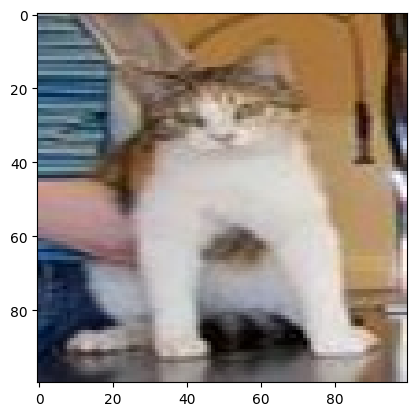

In [ ]:
# print(X_train[1,:])
# print(Y_train)

imageNum = np.random.randint(0, len(X_train))
plt.imshow(X_train[imageNum, :])

# Model

In [ ]:
model = Sequential([
        Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
        MaxPooling2D((2,2)),

        Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid') # Using sigmoid activation function for Binary Classificaiton tasks only.  
  ])

In [ ]:

# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 32)

Epoch 1/5
63/63 [==============================] - 6s 100ms/step - loss: 0.5232 - accuracy: 0.7465
Epoch 2/5
63/63 [==============================] - 7s 106ms/step - loss: 0.4811 - accuracy: 0.7750
Epoch 3/5
63/63 [==============================] - 7s 115ms/step - loss: 0.4395 - accuracy: 0.7980
Epoch 4/5
63/63 [==============================] - 7s 111ms/step - loss: 0.3907 - accuracy: 0.8265
Epoch 5/5
63/63 [==============================] - 7s 114ms/step - loss: 0.3556 - accuracy: 0.8415


In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 27ms/step - loss: 0.6140 - accuracy: 0.6775


[0.6139553189277649, 0.6775000095367432]